<p style="padding: 10px;
          color:#44c7fb;
          font-family:Arial;
          text-align: center;
          font-size:190%;">
CRM Analytics

</p>

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Understanding CRM Analytics

CRM analytics refers to the process of gathering and analyzing customer data to enhance business decision-making. It provides insights into sales performance, customer behavior, and service efficiency. By leveraging CRM analytics, businesses can optimize their marketing strategies, improve customer interactions, and drive higher conversions. CRM software automates data collection, making reporting and trend identification seamless. 
    
<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Key Benefits of CRM Analytics
    
- **Enhanced Customer Insights:** Gain a deeper understanding of customer preferences, purchasing patterns, and engagement levels.
- **Optimized Sales Strategies:** Identify high-performing sales tactics and refine lead generation efforts for maximum impact.
- **Improved Customer Experience:** Monitor service performance and tailor interactions to boost customer satisfaction.
- **Data-Driven Decision Making:** Leverage real-time analytics to adapt marketing and service strategies dynamically.

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "border:2px solid #44c7fb; background-color:#44c7fb; color:white; font-family:Arial;font-size:120%;">Contents</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style = "color:#44c7fb; font-family:Arial;font-size:120%;">Importing Libraries<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#44c7fb; font-family:Arial;font-size:120%;">Data Load<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#44c7fb; font-family:Arial;font-size:120%;">Exploratory Data Analysis<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#44c7fb; font-family:Arial;font-size:120%;">Data Preprocessing<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#44c7fb; font-family:Arial;font-size:120%;">RFM Analysis<span class="badge badge-primary badge-pill">5</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" target="_self" style = "color:#44c7fb; font-family:Arial;font-size:120%;">Cohort Analysis<span class="badge badge-primary badge-pill">6</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" target="_self" style = "color:#44c7fb; font-family:Arial;font-size:120%;">Customer Lifetime Value<span class="badge badge-primary badge-pill">7</span></a>

</div>
</div>
</div>

<a id = "1"></a>
    
<span style=" font-family:Arial; font-size:190%; color:#44c7fb; ">Importing Libraries</span>

In [134]:
import os
import datetime
import squarify
import warnings
import pandas as pd 
import numpy as np
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

<IPython.core.display.Javascript object>

In [87]:
%matplotlib inline
%load_ext nb_black
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
palette = 'pastel'

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

<a id = "2"></a>
<span style=" font-family:Arial; font-size:190%; color:#44c7fb; ">Data Load</span>

In [55]:
df1 = pd.read_csv('data.csv',
                 header = 0,
                 encoding = 'unicode_escape',
                 dtype = {'CustomerID': str,
                          'InvoiceID': str},
                 parse_dates = ['InvoiceDate'], 
                 infer_datetime_format = True)
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<IPython.core.display.Javascript object>

<a id = "3"></a>
<span style=" font-family:Arial; font-size:190%; color:#44c7fb; ">Exploratory Data Analysis</span>


<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Dataset Context

E-commerce datasets are often proprietary, making publicly available transaction data scarce. However, the UCI Machine Learning Repository provides access to a real-world dataset containing transaction records from 2010 and 2011. This dataset, titled "Online Retail," is hosted on their platform and serves as a valuable resource for analyzing customer purchasing behavior.

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Column Description
    
- **InvoiceNo:** A unique 6-digit identifier for each transaction. If it begins with the letter 'C', the transaction was canceled.
- **StockCode:** A 5-digit code representing a specific product.
- **Description:** The name of the product.
- **Quantity:** The number of units of each product purchased in a transaction.
- **InvoiceDate:** The timestamp indicating when the transaction took place.
- **UnitPrice:** The price of a single unit of the product.
- **CustomerID:** A unique 5-digit identifier assigned to each customer.
- **Country:** The country where the customer is located.

In [58]:
# Important metrics for columns
def check_data(df):
    print(" SHAPE ".center(50,'-'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print(" TYPES ".center(50,'-'))
    print(df.dtypes)
    print(" MISSING VALUES ".center(50,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(50,'-'))
    print(df.duplicated().sum())
    print(" QUANTILES ".center(50,'-'))
    # print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print(df[['Quantity', 'UnitPrice']].quantile([0, 0.25, 0.50, 0.75, 1]).T)

    
check_data(df1)

--------------------- SHAPE ----------------------
Rows: 541909
Columns: 8
--------------------- TYPES ----------------------
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object
----------------- MISSING VALUES -----------------
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
--------------- DUPLICATED VALUES ----------------
5268
------------------- QUANTILES --------------------
               0.00  0.25  0.50   0.75     1.00
Quantity  -80995.00  1.00  3.00  10.00  80995.0
UnitPrice -11062.06  1.25  2.08   4.13  38970.0


<IPython.core.display.Javascript object>

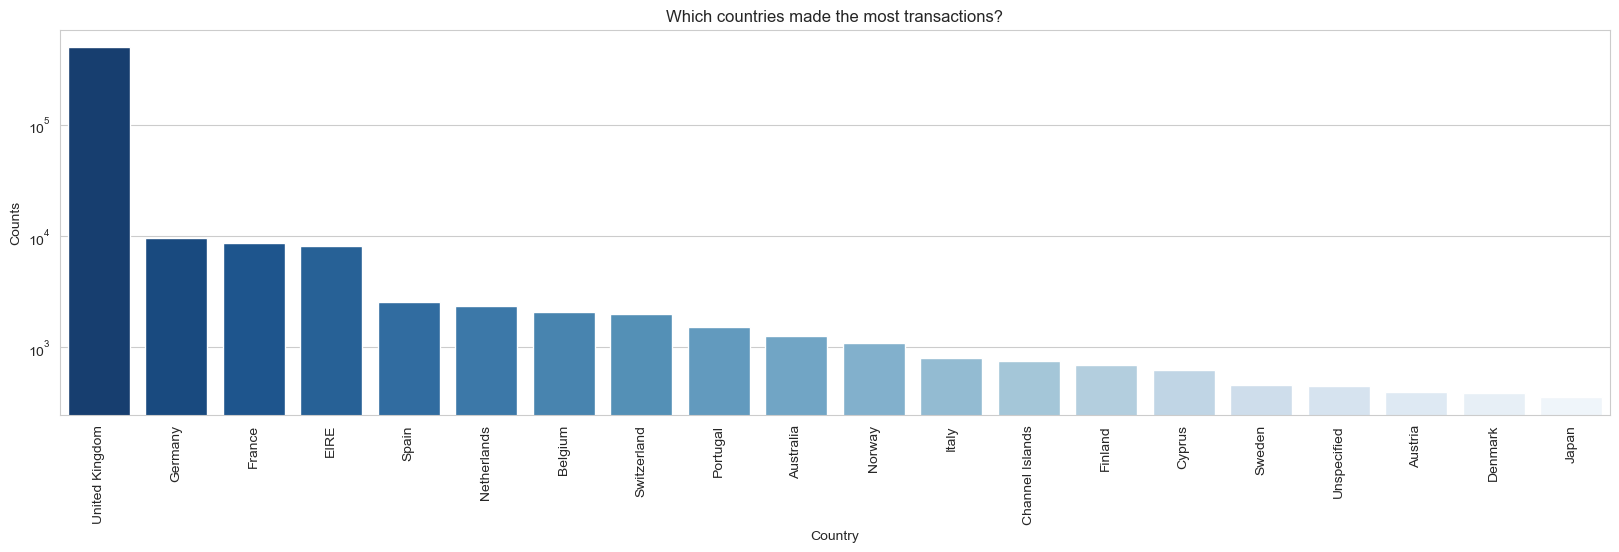

<IPython.core.display.Javascript object>

In [59]:
# Country-wise number of transactions
country_counts = df1.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="Blues_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?")
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

In [140]:
print("No. of unique products: {}".format(len(df1['Description'].value_counts())))

No. of unique products: 4223


<IPython.core.display.Javascript object>

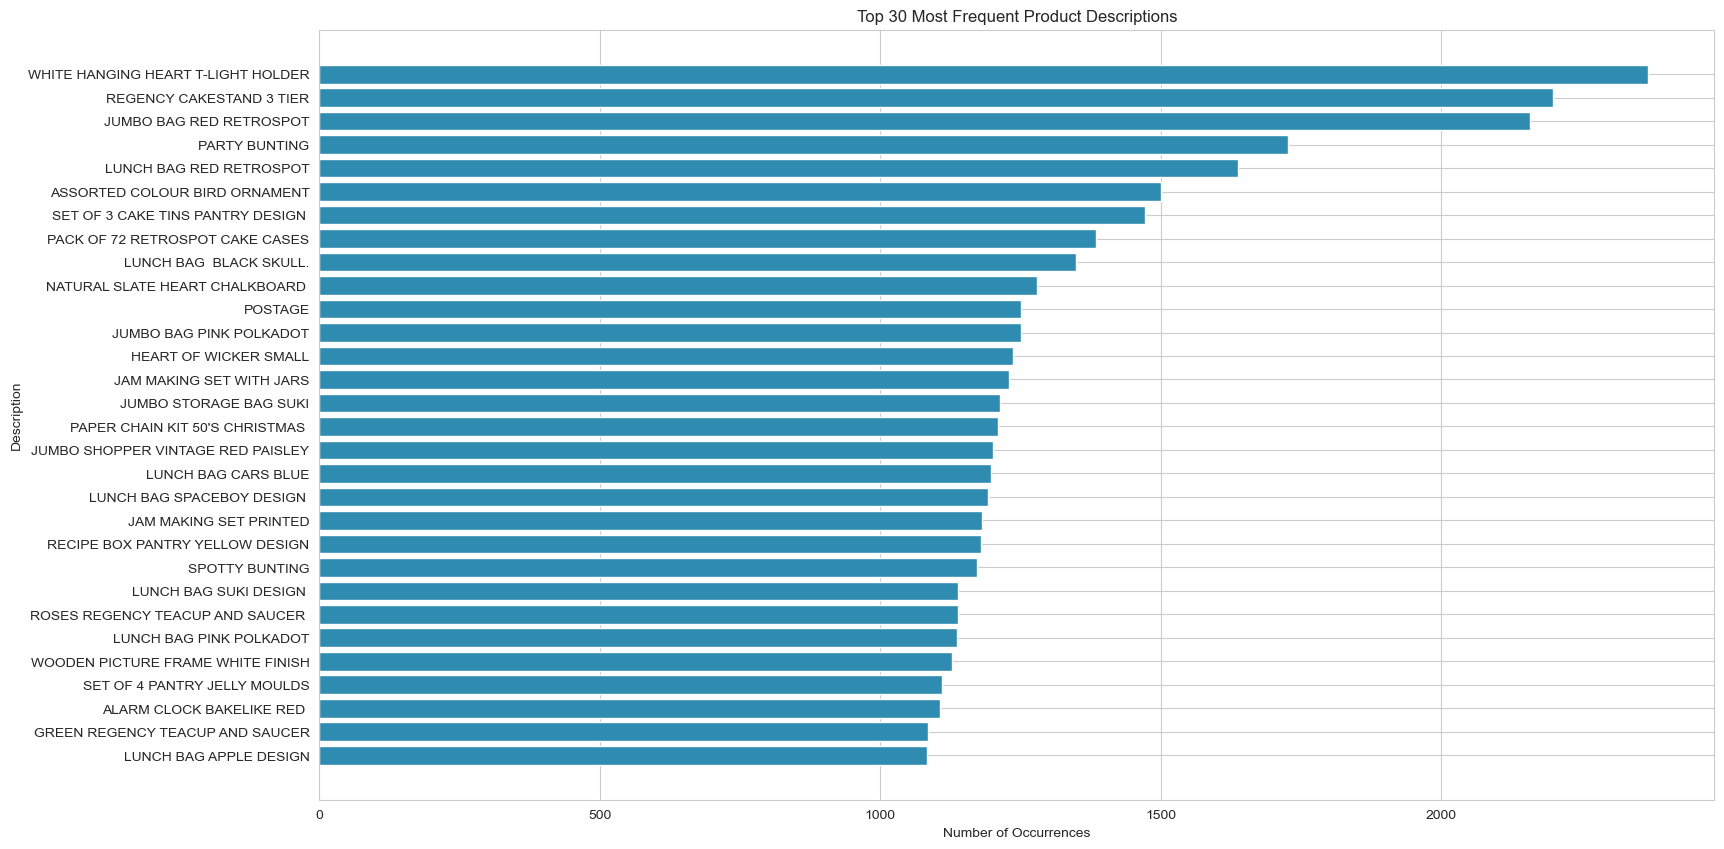

<IPython.core.display.Javascript object>

In [138]:
# Calculate the occurrence of each unique description and sort them
description_counts = df1['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(18,10))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#308bb0')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Product Descriptions')

# Show the plot
plt.show()

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Descriptive Statistics

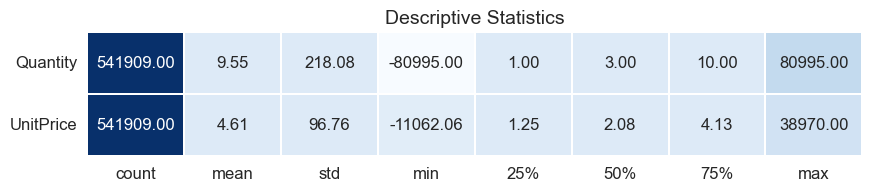

<IPython.core.display.Javascript object>

In [43]:
def desc_stats(dataframe):
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= dataframe.describe().T.columns,
                           data= dataframe.describe().T)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot = True,
                cmap = "Blues",
                fmt = '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.1,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 12)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df1.select_dtypes(include = [float, int]))

✔️  It is clearly seems that there are ouliters in Quantity and UnitPrice that have to be handled <br />
✔️  There are negative values in UnitPrice and Quantity because of **cancelled orders**. <br /> 
✔️  Missing values in Customer ID and Description. <br />
✔️  Quantity and Unit Price should be multiplied in order to create **Total Price**.

<a id = "4"></a>
<span style=" font-family:Arial; font-size:190%; color:#44c7fb; ">Data Preprocessing</span>

In [45]:
def replace_with_thresholds(df, variable, q1 = 0.25, q3 = 0.75):
    
    '''
    Detects outliers with IQR method and replaces with thresholds 
    '''
    
    df_ = df.copy()
    quartile1 = df_[variable].quantile(q1)
    quartile3 = df_[variable].quantile(q3)
    iqr = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    df_.loc[(df_[variable] < low_limit), variable] = low_limit
    df_.loc[(df_[variable] > up_limit), variable] = up_limit
    
    return df_

def ecommerce_preprocess(df):
    df_ = df.copy()
    
    # Missing Values
    df_ = df_.dropna()
    
    # Cancelled Orders & Quantity
    df_ = df_[~df_['InvoiceNo'].str.contains('C', na = False)]
    df_ = df_[df_['Quantity'] > 0]
    
    # Replacing Outliers
    df_ = replace_with_thresholds(df_, "Quantity", q1 = 0.01, q3 = 0.99)
    df_ = replace_with_thresholds(df_, "UnitPrice", q1 = 0.01, q3 = 0.99)
    
    # Total Price
    df_["TotalPrice"] = df_["Quantity"] * df_["UnitPrice"]
    
    return df_

<IPython.core.display.Javascript object>

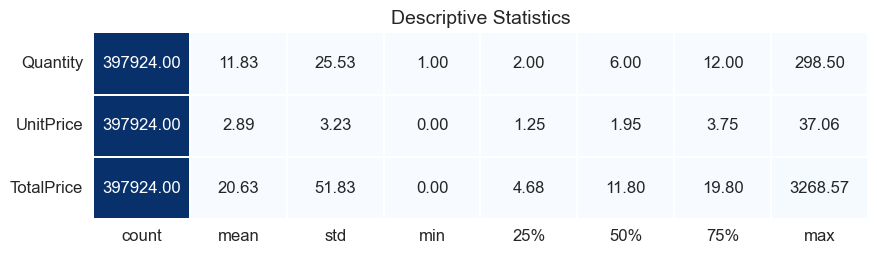

<IPython.core.display.Javascript object>

In [60]:
df = ecommerce_preprocess(df1)

# Stats after removing outliers and missing values
desc_stats(df.select_dtypes(include = [float, int]))

<a id = "5"></a>
<span style=" font-family:Verdana; font-size:190%; color:#44c7fb; ">RFM Analysis</span>

RUnderstanding RFM Metrics
RFM stands for **Recency**, **Frequency**, and **Monetary** value, each representing a key aspect of customer behavior. These metrics are essential for evaluating customer engagement, retention, and lifetime value.

Key insights from RFM analysis:

- Customers who have purchased recently are more likely to respond to promotions.
- Frequent buyers tend to be more engaged and loyal.
- Higher monetary value distinguishes high-spending customers from those with lower purchase amounts.

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Verdana;">
RFM Metrics

In [66]:
# Most recent purchase
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


<IPython.core.display.Javascript object>

In [68]:
today_date = dt.datetime(2011,12,11)

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,       # days since most recent purchase
                                    'InvoiceNo': lambda x: x.nunique(),                         # number of purchases
                                    'TotalPrice': lambda x: x.sum()})                           # total amount of purchases
# Rename columns
rfm.columns = ['recency', 'frequency', 'monetary']

# Filter out rows where 'monetary' is less than or equal to zero
rfm = rfm[rfm['monetary'] > 0]

rfm = rfm.reset_index()
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346,326,1,310.44
1,12347,3,7,4310.00
2,12348,76,4,1770.78
3,12349,19,1,1491.72
4,12350,311,1,331.46


<IPython.core.display.Javascript object>

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
RFM Scores

In [70]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["recency"], 5, labels=[5, 4, 3, 2, 1])
    df_["frequency_score"] = pd.qcut(
        df_["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df_["monetary_score"] = pd.qcut(df_["monetary"], 5, labels=[1, 2, 3, 4, 5])
    df_["RF_SCORE"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(
        str
    )

    return df_


rfm = get_rfm_scores(rfm)

<IPython.core.display.Javascript object>

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Segmentation

In [83]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex = True)

rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,RF_SCORE,segment
0,12346,326,1,310.44,1,1,2,11,11,hibernating
1,12347,3,7,4310.00,5,5,5,55,55,champions
2,12348,76,4,1770.78,2,4,4,24,24,at_risk
3,12349,19,1,1491.72,4,1,4,41,41,promising
4,12350,311,1,331.46,1,1,2,11,11,hibernating


<IPython.core.display.Javascript object>

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Segmentation Map

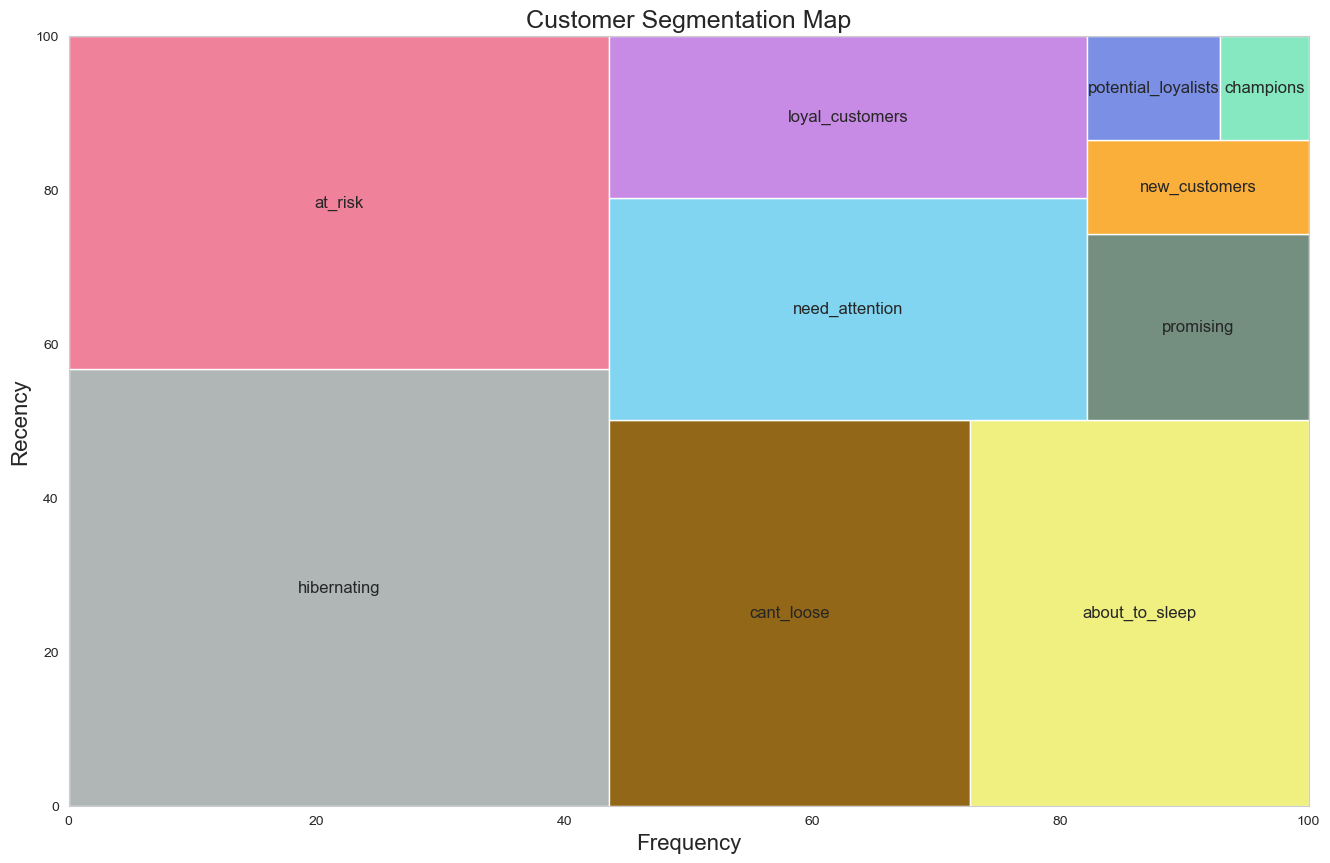

<IPython.core.display.Javascript object>

In [88]:
# Treemap for segments
segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 12},
)
plt.title("Customer Segmentation Map", fontsize=18)
plt.xlabel("Frequency", fontsize=16)
plt.ylabel("Recency", fontsize=16)
plt.show()

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Segment Evaluation

In [85]:
print(' RFM Model Evaluation '.center(50, '='))
X = rfm[['recency_score', 'frequency_score']]
labels = rfm['segment']

print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')

# how similar each point is to its own cluster compared to other clusters; higher values indicate better-defined clusters (-1 to +1)
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
# ratio of the sum of between-cluster dispersion to within-cluster dispersion; higher values suggest better clustering (0 to +∞)
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
# average similarity ratio of each cluster with the one that is most similar to it; lower values indicate better clustering (0 to +∞)
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{50*"="}')

============== RFM Model Evaluation ==============
Number of Observations: 4338
Number of Segments: 10
Silhouette Score: 0.471
Calinski Harabasz Score: 4590.526
Davies Bouldin Score: 0.633 


<IPython.core.display.Javascript object>

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Segment Analysis

In [86]:
# Descriptive analysis for segments
rfm[['recency','monetary','frequency','segment']]\
.groupby('segment')\
.agg({'mean','std','max','min'})

recency                             monetary              \
                        min  max        std        mean      min         max   
segment                                                                        
about_to_sleep           34   72  10.943474   53.312500     6.20    6207.670   
at_risk                  73  374  68.618828  153.785835    52.00   11072.670   
cant_loose               73  373  65.250378  132.968254    70.02   10254.180   
champions                 1   13   3.683300    6.361769   198.23  266163.525   
hibernating              73  374  92.013560  217.605042     3.75    9182.345   
loyal_customers          15   72  15.577050   33.608059    36.56  120210.355   
need_attention           34   72  11.552074   52.427807     6.90    4353.830   
new_customers             1   13   3.902112    7.428571    89.94     848.550   
potential_loyalists       1   33   9.338808   17.398760    20.80    4628.750   
promising                15   33   5.192519   23.510638    30.00    1491.720   

                                               frequency                  \
                              std         mean       min  max        std   
segment                                                                    
about_to_sleep         533.161343   469.058097         1    2   0.368913   
at_risk                943.170824   938.458341         2    6   0.954415   
cant_loose            2008.352354  2646.822540         6   34   4.289630   
champions            18366.105822  6498.612978         3  210  16.476484   
hibernating            553.714975   398.573036         1    2   0.302492   
loyal_customers       5405.787839  2752.519574         3   63   4.545669   
need_attention         732.298552   847.657086         2    3   0.470081   
new_customers          174.620952   314.883690         1    1   0.000000   
potential_loyalists    601.746293   674.628357         1    3   0.651401   
promising              223.634736   285.623723         1    1   0.000000   

                                
                          mean  
segment                         
about_to_sleep        1.161932  
at_risk               2.878583  
cant_loose            8.380952  
champions            12.417062  
hibernating           1.101774  
loyal_customers       6.479853  
need_attention        2.326203  
new_customers         1.000000  
potential_loyalists   2.010331  
promising             1.000000

<IPython.core.display.Javascript object>

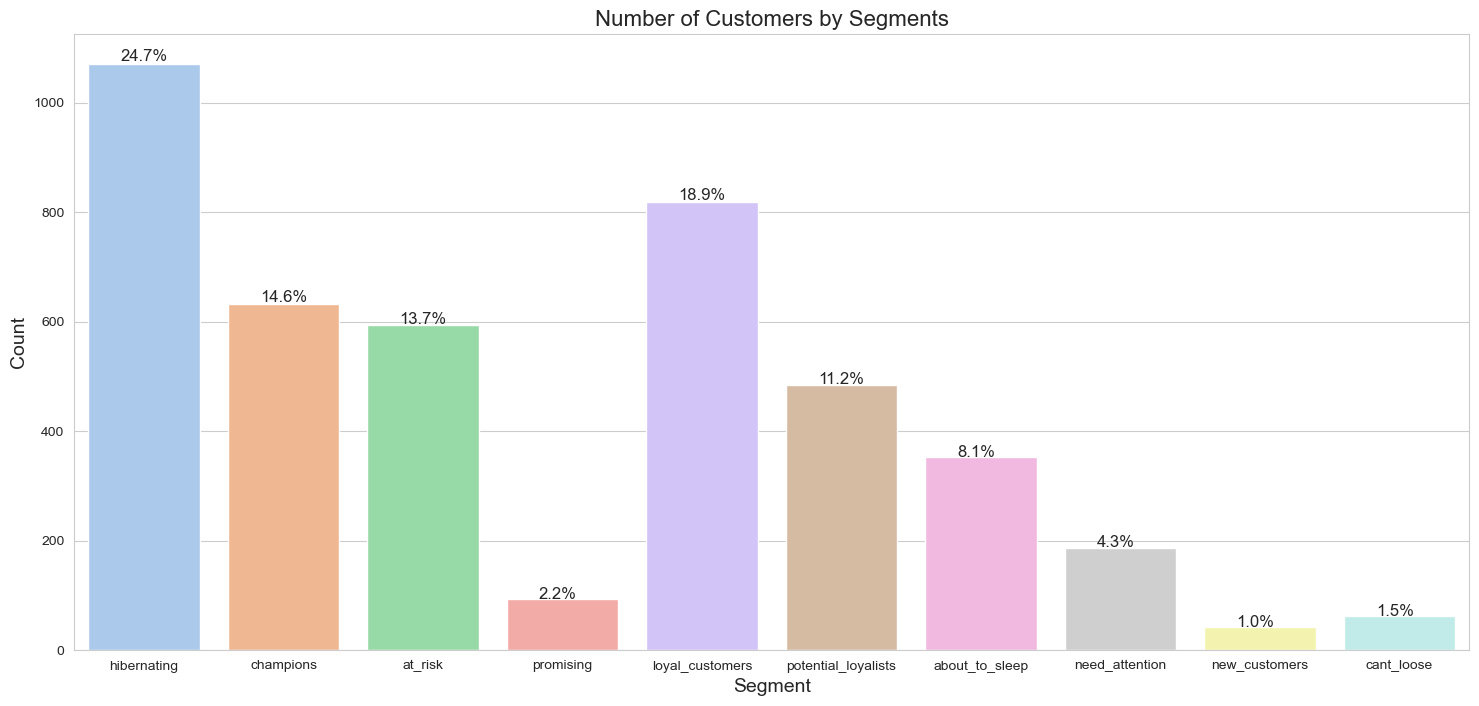

<IPython.core.display.Javascript object>

In [117]:
# Distribution of customers among various segments
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 12)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

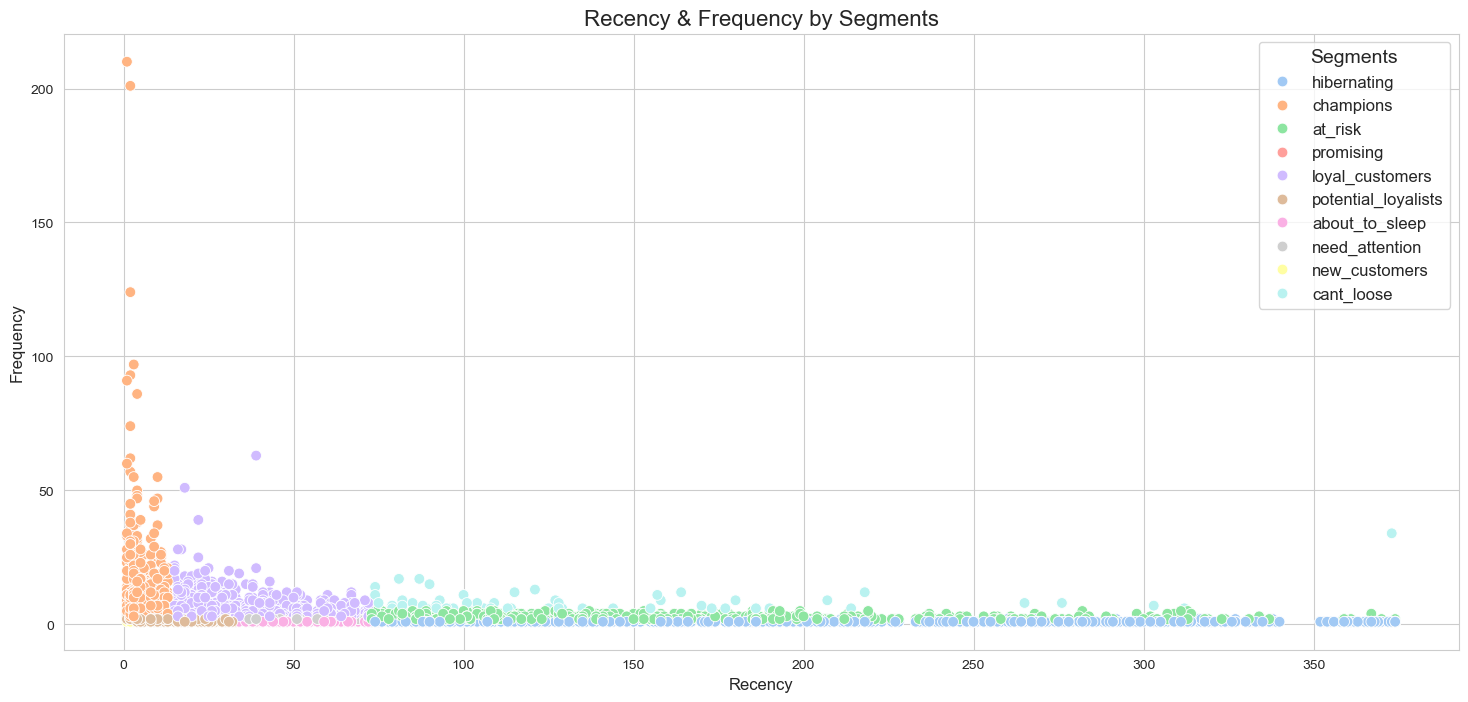

<IPython.core.display.Javascript object>

In [119]:
# Recency and frequency of segments
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="recency", y="frequency", hue="segment", palette=palette, s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

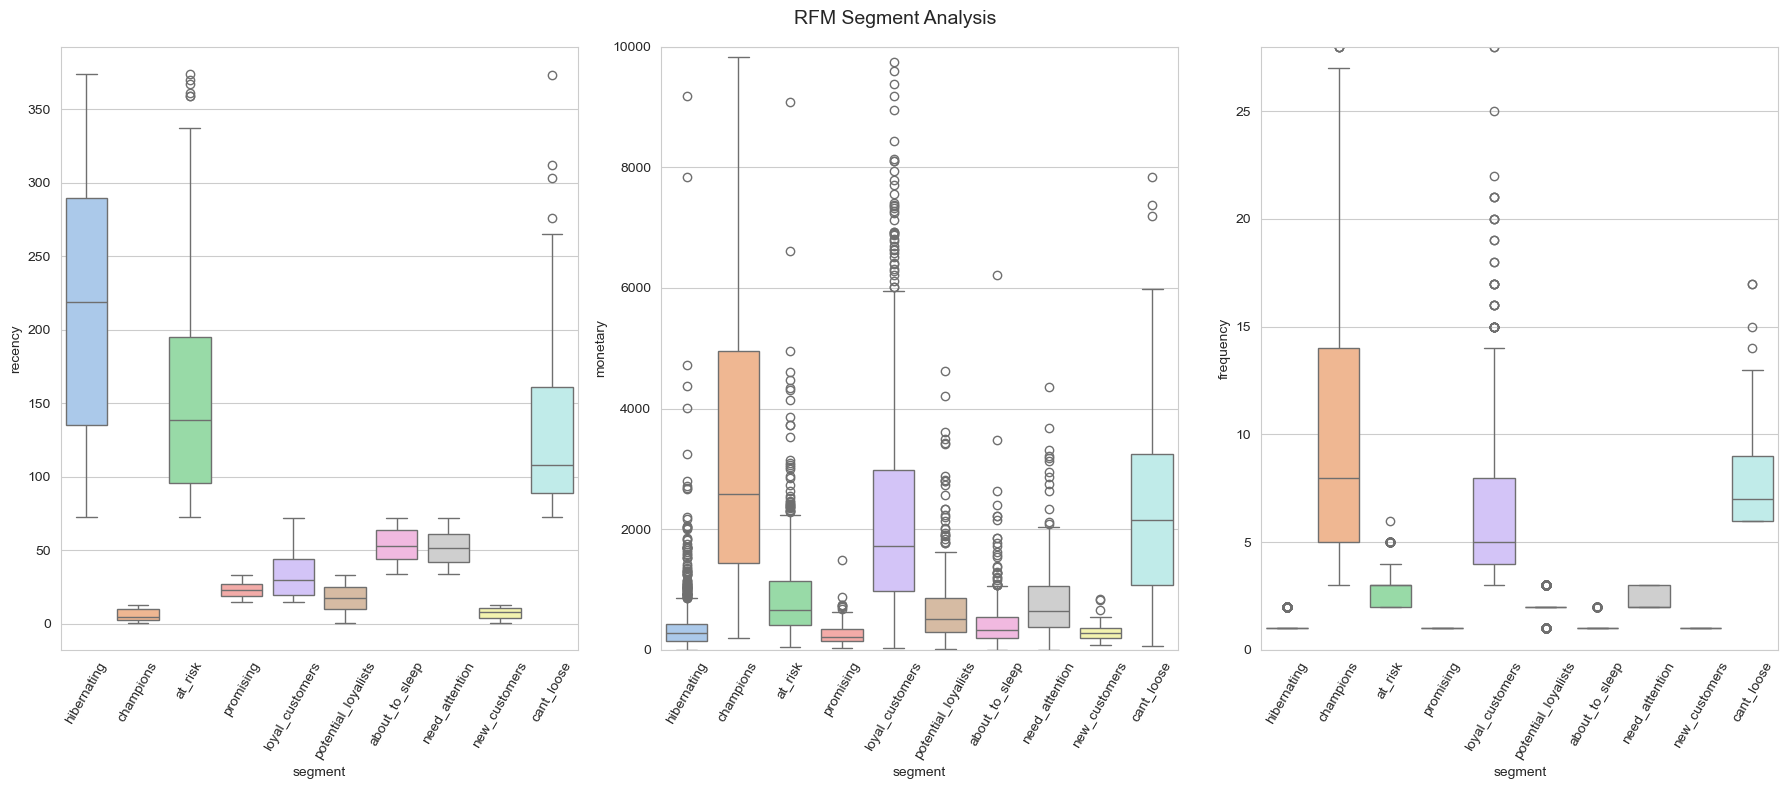

<IPython.core.display.Javascript object>

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["recency", "monetary", "frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0,10000])
    if idx == 2:
        axes[idx].set_ylim([0,28])
plt.tight_layout()
plt.show()

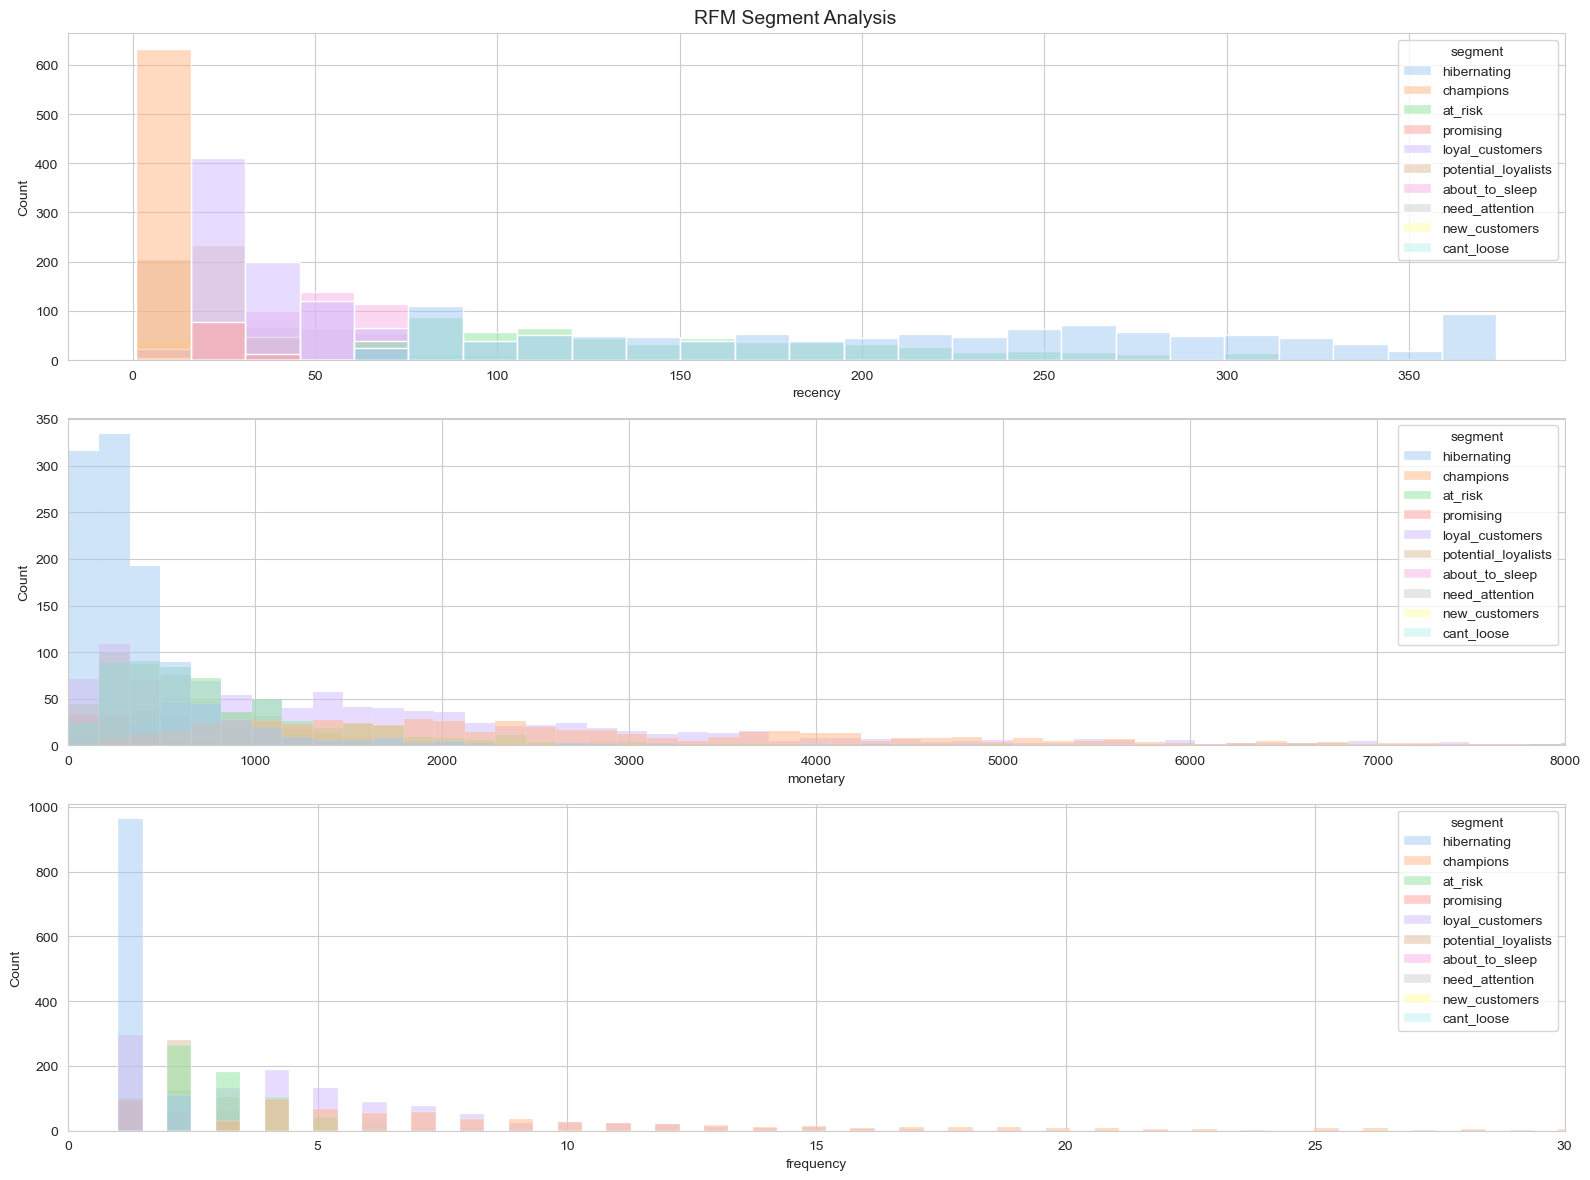

<IPython.core.display.Javascript object>

In [123]:
# Histogram of RFM features
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= palette)
    if idx == 1:
        axes[idx].set_xlim([0, 8000])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()

<a id = "6"></a>
<span style=" font-family:Arial; font-size:190%; color:#44c7fb; ">Cohort Analysis</span>

A cohort is a group of people sharing something in common, such as the sign-up date to an app, the month of the first purchase, geographical location, acquisition channel (organic users, coming from performance marketing, etc.) and so on. In Cohort Analysis, we track these groups of users over time, to identify some common patterns or behaviors.

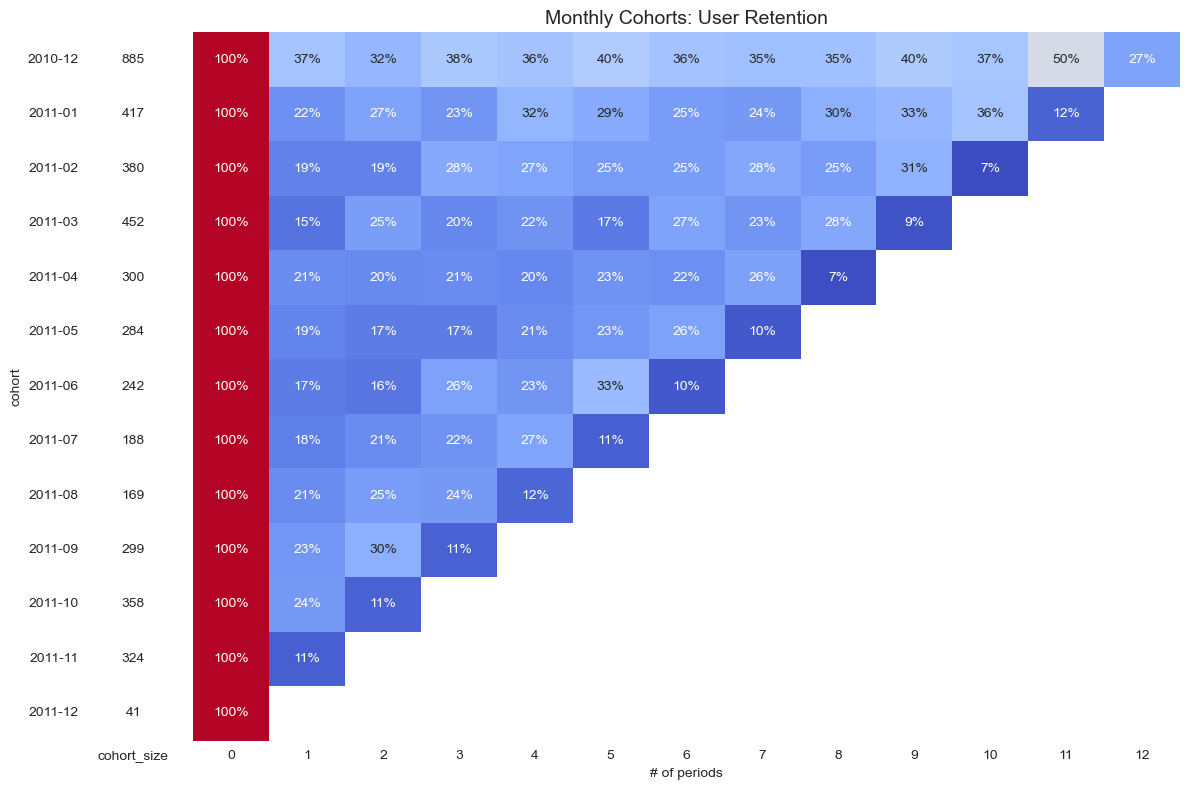

<IPython.core.display.Javascript object>

In [125]:
def CohortAnalysis(dataframe):

    data = dataframe.copy()
    data = data[["CustomerID", "InvoiceNo", "InvoiceDate"]].drop_duplicates()
    data["order_month"] = data["InvoiceDate"].dt.to_period("M")

    # cohort here is the first purchase month fo each customer
    data["cohort"] = (
        data.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")
    )
    cohort_data = (
        data.groupby(["cohort", "order_month"])
        .agg(n_customers=("CustomerID", "nunique"))
        .reset_index(drop=False)
    )

    # period number is the number of months passed since the first purchase
    cohort_data["period_number"] = (cohort_data.order_month - cohort_data.cohort).apply(
        attrgetter("n")
    )

    #  pivot table where rows = cohorts (first purchase month), columns = period number (months after first purchase, values = number of active customers
    cohort_pivot = cohort_data.pivot_table(
        index="cohort", columns="period_number", values="n_customers"
    )
    cohort_size = cohort_pivot.iloc[:, 0]

    # Retention matrix(percentage of customers retained over time) from this pivot table
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)


    with sns.axes_style("white"):
        fig, ax = plt.subplots(
            1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
        )
        sns.heatmap(
            retention_matrix,
            mask=retention_matrix.isnull(),
            annot=True,
            cbar=False,
            fmt=".0%",
            cmap="coolwarm",
            ax=ax[1],
        )
        ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)
        ax[1].set(xlabel="# of periods", ylabel="")
        white_cmap = mcolors.ListedColormap(["white"])
        sns.heatmap(
            pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}),
            annot=True,
            cbar=False,
            fmt="g",
            cmap=white_cmap,
            ax=ax[0],
        )
        fig.tight_layout()
    
CohortAnalysis(df)

<a id = "7"></a>
<span style=" font-family:Arial; font-size:190%; color:#44c7fb; ">Customer Lifetime Value</span>

Customer lifetime value is how much money a customer will bring your brand throughout their entire time as a paying customer.

In [126]:
cltv_df = df.groupby("CustomerID").agg(
    {
        "InvoiceDate": [
            lambda x: (x.max() - x.min()).days,
            lambda x: (today_date - x.min()).days,
        ],
        "InvoiceNo": "nunique",
        "TotalPrice": "sum",
    }
)

cltv_df.columns = cltv_df.columns.droplevel(0)
# T is customer tenure(number of days between first purchase & today_date), Recency(number of days between first & last purchase) reflects engagement, Frequency shows repeat purchases, Monetary indicates revenue contribution
cltv_df.columns = ["recency", "T", "frequency", "monetary"]
cltv_df.head()

,recency,T,frequency,monetary
CustomerID,,,,
12346,0,326,1,310.44
12347,365,368,7,4310.00
12348,282,359,4,1770.78
12349,0,19,1,1491.72
12350,0,311,1,331.46


<IPython.core.display.Javascript object>

In [129]:
#Average Order Value
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

#Recency & Tenure
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

#Frequency
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df.head()

,recency,T,frequency,monetary
CustomerID,,,,
12347,1.064140,1.072886,7,12.565598
12348,0.822157,1.046647,4,27.668437
12352,0.758017,0.865889,8,3.430352
12356,0.880466,0.950437,3,104.127037
12358,0.434402,0.440233,2,143.802500


<IPython.core.display.Javascript object>

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
BG/NBD
    
Beta Geometric / Negative Binomial Distribution models assume that the number of transactions made by each customer follows a Poisson process with a heterogeneity in transaction rates across customers following a **gamma distribution**. These assumptions give us a Negative binomial distribution (NBD) for modeling the number of transactions made by the customer while he is alive. We can build BG/NBD model by using <code>BetaGeoFitter</code> and <code>lifetimes</code> packages.

In [130]:
BGF = BetaGeoFitter(penalizer_coef=0.001)  # avoid overfitting

BGF.fit(cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 0.23, b: 2.49, r: 2.18>

<IPython.core.display.Javascript object>

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Top 10 Expected Number of Transaction (1 Week)

In [131]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    1, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,CustomerID,Expected Number of Transactions
0,12748,154.415677
1,14911,147.864591
2,17841,91.755180
3,13089,72.687368
4,14606,69.228708
5,15311,67.796527
6,12971,64.165126
7,14646,57.733917
8,13408,46.633268
9,18102,45.780800


<IPython.core.display.Javascript object>

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Top 10 Expected Number of Transaction (1 Month)

In [132]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    4, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,CustomerID,Expected Number of Transactions
0,12748,579.462243
1,14911,554.876373
2,17841,344.300849
3,13089,272.660306
4,14606,259.760228
5,15311,254.385318
6,12971,240.739342
7,14646,216.312507
8,13408,174.960869
9,18102,171.685429


<IPython.core.display.Javascript object>

<span style="color:#44c7fb;
             font-size:160%;
             font-family:Arial;">
Frequency of Repeat Transactions

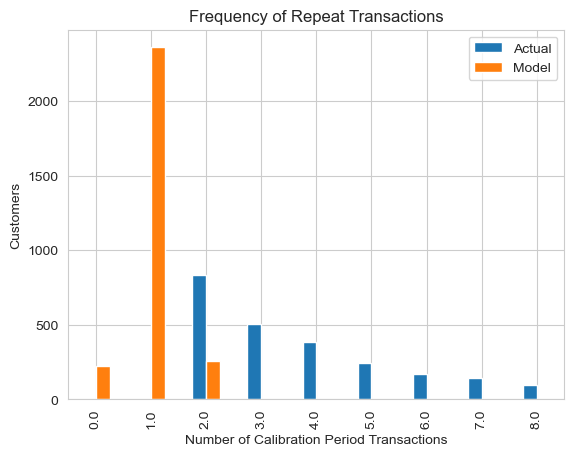

<IPython.core.display.Javascript object>

In [133]:
# Plot a figure with period actual and predicted transactions.
plot_period_transactions(BGF, max_frequency=7)
plt.show()